Epoch 1/20
625/625 [==============================] - 65s 102ms/step - loss: 1.7771 - accuracy: 0.3440 - val_loss: 1.4234 - val_accuracy: 0.5068
Epoch 2/20
625/625 [==============================] - 62s 99ms/step - loss: 1.4126 - accuracy: 0.4915 - val_loss: 1.2431 - val_accuracy: 0.5585
Epoch 3/20
625/625 [==============================] - 60s 97ms/step - loss: 1.2845 - accuracy: 0.5457 - val_loss: 1.1483 - val_accuracy: 0.5902
Epoch 4/20
625/625 [==============================] - 59s 95ms/step - loss: 1.1763 - accuracy: 0.5831 - val_loss: 1.0419 - val_accuracy: 0.6284
Epoch 5/20
625/625 [==============================] - 65s 105ms/step - loss: 1.1171 - accuracy: 0.6090 - val_loss: 1.0040 - val_accuracy: 0.6529
Epoch 6/20
625/625 [==============================] - 62s 98ms/step - loss: 1.0559 - accuracy: 0.6335 - val_loss: 0.9366 - val_accuracy: 0.6732
Epoch 7/20
625/625 [==============================] - 61s 98ms/step - loss: 1.0011 - accuracy: 0.6522 - val_loss: 0.9035 - val_accurac

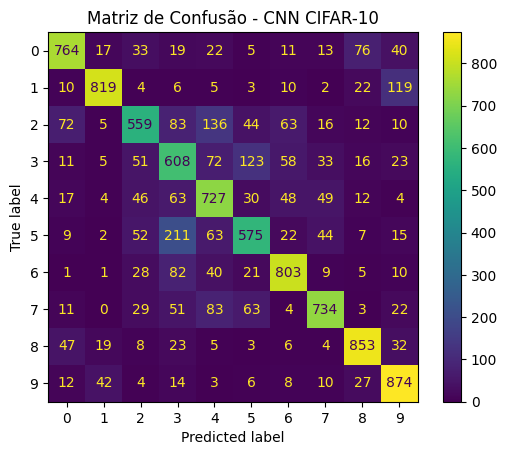

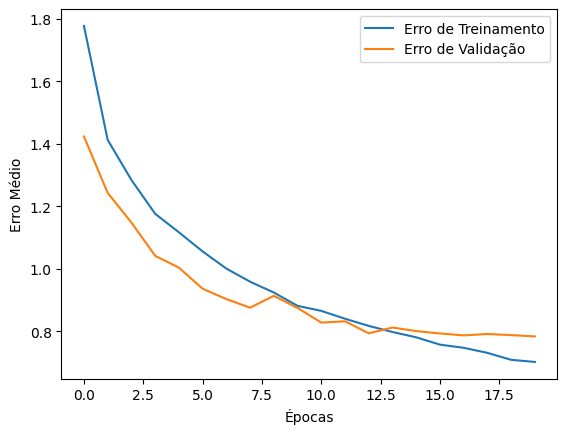

Acurácia: 0.7316
Precisão: 0.7362
Revocação: 0.7316
F1 Score: 0.7315


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

# Carregar a base de dados CIFAR-10
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalizar os dados
X_train = X_train / 255.0
X_test = X_test / 255.0

# Converter rótulos para one-hot encoding
y_train_one_hot = tf.keras.utils.to_categorical(y_train, 10)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, 10)

# Dividir os dados de treinamento em treinamento e validação
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2, random_state=42)

# Construir a arquitetura da CNN
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compilar o modelo
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Treinar o modelo
history = cnn_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), batch_size=64)

# Avaliar o modelo
loss, accuracy = cnn_model.evaluate(X_test, y_test_one_hot)
print(f'Test accuracy: {accuracy:.4f}')

# Fazer predições
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten()

# Calcular a matriz de confusão
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap='viridis')
plt.title('Matriz de Confusão - CNN CIFAR-10')
plt.show()

# Visualizar a curva de erro médio de treinamento e validação
plt.plot(history.history['loss'], label='Erro de Treinamento')
plt.plot(history.history['val_loss'], label='Erro de Validação')
plt.xlabel('Épocas')
plt.ylabel('Erro Médio')
plt.legend()
plt.show()

# Calcular as métricas de desempenho
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')
f1 = f1_score(y_true, y_pred_classes, average='macro')

print(f'Acurácia: {accuracy:.4f}')
print(f'Precisão: {precision:.4f}')
print(f'Revocação: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
